### Import libraries

In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Importing Dataset

In [59]:
df= pd.read_csv("50_Startups_MLR.csv")

In [60]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Dropping some column

In [61]:
df.drop(columns=["State"],axis=1,inplace=True) # delete the specific coloumn. axis=1 means coloumn inplace=True is used to update the value
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


#### Check null values

In [62]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

### Visualisation

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


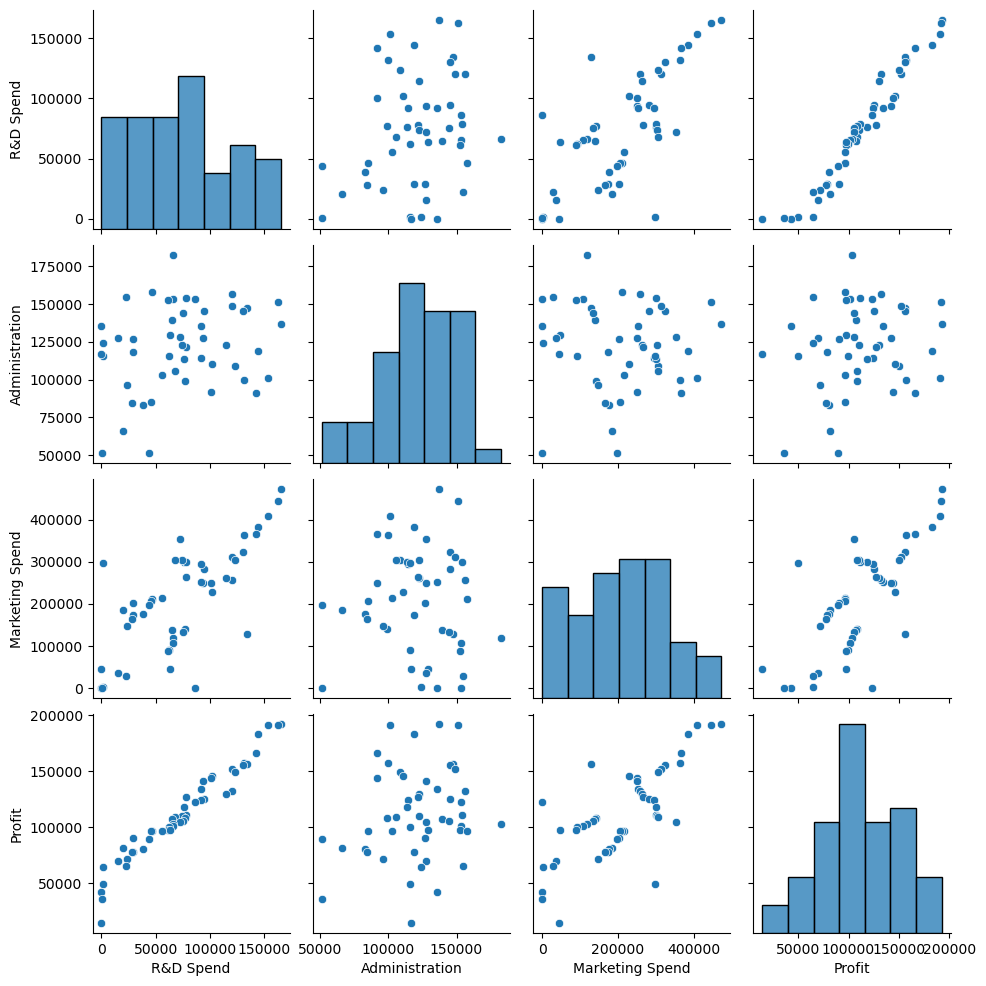

In [63]:
import seaborn as sns
sns.pairplot(df)

In [64]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### X and Y ,train test split

In [65]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [67]:
np.shape(y_test)

(15,)

### Standardization

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scale= StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

### Fit in the Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [71]:
regression.fit(X_train,y_train)

LinearRegression()

In [72]:
from sklearn.model_selection import cross_val_score
validationscore =cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3) #If the data is 300 then 300/3 is 100 therefore cv=1 it takes first hundred values for train data and then second hundred for cv=2 and so on...



In [73]:
print(validationscore)
np.mean(validationscore)

[-6.53163506e+07 -7.12542987e+07 -1.61762547e+08]


-99444398.8258663

In [74]:
y_predict= regression.predict(X_test)
y_predict

array([125972.1482631 ,  85471.92270964,  98924.15168288,  46639.7862872 ,
       128142.12473185,  52602.19053671, 108364.69760175, 100331.58846892,
        97538.56674666, 112496.70398401, 128110.85388838, 173383.29618108,
        93334.03668271, 149432.23776236, 173293.94964905])

In [75]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
Name: Profit, dtype: float64

In [76]:
print(np.shape(y_test))
np.shape(y_predict)

(15,)


(15,)

### Some assumption

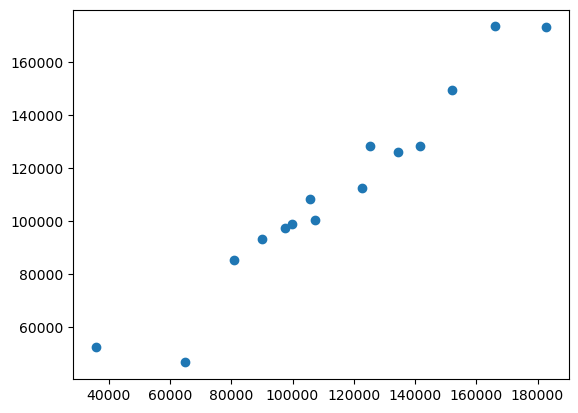

In [77]:
plt.scatter(y_test,y_predict)

In [78]:
residuals=y_test-y_predict
residuals

13     8335.201737
39    -4466.162710
30     1013.438317
45    18286.293713
17    -2771.754732
48   -16928.780537
26    -2631.157602
25     7072.751531
32     -110.726747
19    10280.156016
12    13474.666112
4     -7195.356181
37    -3384.896683
8      2779.532238
3      9608.040351
Name: Profit, dtype: float64

c:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


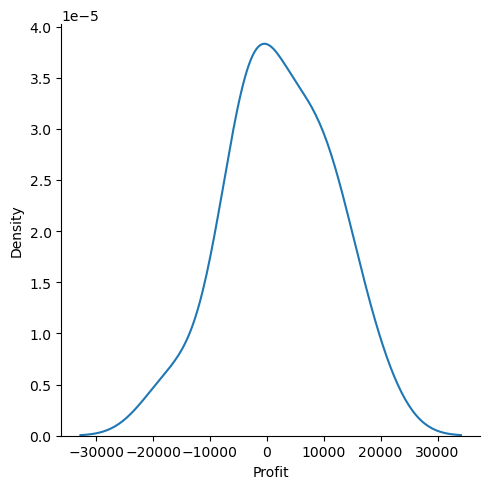

In [79]:
sns.displot(residuals,kind='kde')

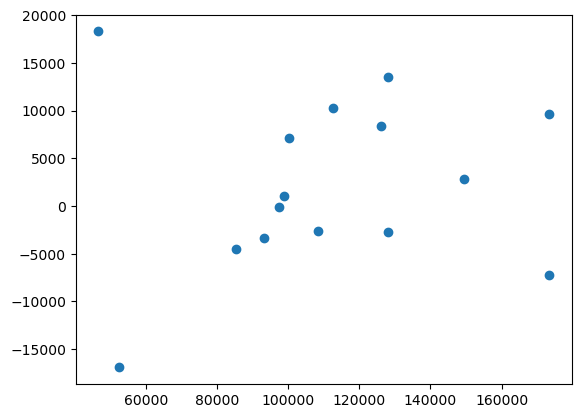

In [81]:
plt.scatter(y_predict,residuals) #It doesnot follow any pattern so it is in uniform distribution therefore it is correct